<a href="https://colab.research.google.com/github/athiraa12/AB-Testing-Loan-Approval/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("loan_offer_ab_test.csv", encoding="utf-8")


In [2]:
df.head()

,user_id,group,email_subject,opened,clicked,applied,approved,credit_score,income_band,region,device,send_time
0,1,A,Low Interest,0,0,0,0,644,3–6L,West,Mobile,2025-06-27
1,2,B,Quick Approval,0,0,0,0,536,<3L,West,Desktop,2025-07-27
2,3,B,Quick Approval,1,0,0,0,655,15L+,North,Mobile,2025-06-26
3,4,B,Quick Approval,0,0,0,0,734,3–6L,South,Mobile,2025-07-11
4,5,A,Low Interest,1,0,0,0,712,3–6L,Central,Mobile,2025-06-16


In [3]:
df.describe()

,user_id,opened,clicked,applied,approved,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.303200,0.044600,0.007800,0.004800,678.393000
std,1443.520003,0.459687,0.206445,0.087981,0.069122,61.191688
min,1.000000,0.000000,0.000000,0.000000,0.000000,449.000000
25%,1250.750000,0.000000,0.000000,0.000000,0.000000,638.000000
50%,2500.500000,0.000000,0.000000,0.000000,0.000000,678.000000
75%,3750.250000,1.000000,0.000000,0.000000,0.000000,720.000000
max,5000.000000,1.000000,1.000000,1.000000,1.000000,891.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        5000 non-null   int64 
 1   group          5000 non-null   object
 2   email_subject  5000 non-null   object
 3   opened         5000 non-null   int64 
 4   clicked        5000 non-null   int64 
 5   applied        5000 non-null   int64 
 6   approved       5000 non-null   int64 
 7   credit_score   5000 non-null   int64 
 8   income_band    5000 non-null   object
 9   region         5000 non-null   object
 10  device         5000 non-null   object
 11  send_time      5000 non-null   object
dtypes: int64(6), object(6)
memory usage: 468.9+ KB


In [7]:
df.nunique()

,0
user_id,5000
group,2
email_subject,2
opened,2
clicked,2
applied,2
approved,2
credit_score,349
income_band,5
region,5


In [10]:
df['group'].value_counts()

,count
group,
A,2500
B,2500


In [12]:

conversion_rates = df.groupby('group')['approved'].mean()
print(conversion_rates)



group
A    0.0044
B    0.0052
Name: approved, dtype: float64


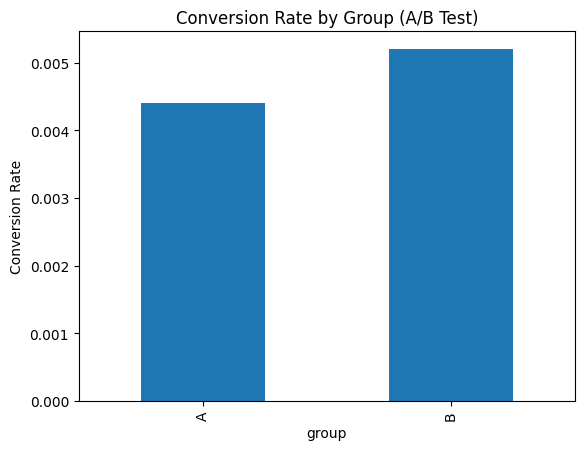

In [13]:
import matplotlib.pyplot as plt

conversion_rates.plot(kind='bar')
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Group (A/B Test)")
plt.show()


In [16]:

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Count of "approved" in each group
approved_A = df[df['group'] == 'A']['approved'].sum()
approved_B = df[df['group'] == 'B']['approved'].sum()

# Total users in each group
n_A = df[df['group'] == 'A'].shape[0]
n_B = df[df['group'] == 'B'].shape[0]

# Run proportions z-test
count = np.array([approved_A, approved_B])
nobs = np.array([n_A, n_B])

stat, pval = proportions_ztest(count, nobs)

print("Z-statistic:", stat)
print("p-value:", pval)

if pval < 0.05:
    print("Reject H0 → Significant difference in approval rates between Group A and B")
else:
    print("Fail to reject H0 → No significant difference in approval rates")



Z-statistic: -0.4092316277947817
p-value: 0.6823696859521062
Fail to reject H0 → No significant difference in approval rates


In [17]:
conv_rate_A = approved_A / n_A
conv_rate_B = approved_B / n_B

print("Approval Rate A:", round(conv_rate_A * 100, 2), "%")
print("Approval Rate B:", round(conv_rate_B * 100, 2), "%")


Approval Rate A: 0.44 %
Approval Rate B: 0.52 %


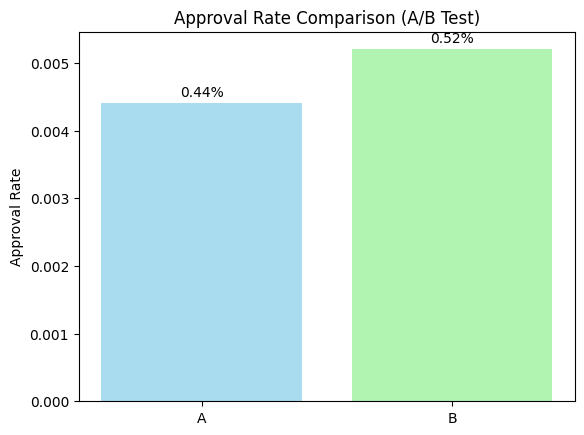

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Values
groups = ['A', 'B']
rates = [conv_rate_A, conv_rate_B]

# Plot
plt.bar(groups, rates, color=['skyblue', 'lightgreen'], alpha=0.7)
plt.ylabel("Approval Rate")
plt.title("Approval Rate Comparison (A/B Test)")

# Annotate bars
for i, rate in enumerate(rates):
    plt.text(i, rate + 0.0001, f"{rate*100:.2f}%", ha='center', fontsize=10)

plt.show()
